# Análisis Exploratorio - Estimación de los niveles de obesidad

## Objetivos del Proyecto

El objetivo del proyecto el realizar el analisis exploratorioa de los datos a la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física.

1. **Análisis Exploratorio de Datos (EDA)**:
   - Realizar un análisis exploratorio para extraer información significativa de los datos.
   - Identificar las mejores características (features) que se utilizarán para el modelado.

---


## Descripción de Variables (Dataset de Obesidad)

| Nombre de la Variable | Tipo de Dato (General) | Descripción Detallada |
| :--- | :--- | :--- |
| **`Gender`** | Categórica (Binaria) | Sexo del individuo (Hombre / Mujer). |
| **`Age`** | Numérica (Continua) | Edad del individuo en años. |
| **`Height`** | Numérica (Continua) | Altura del individuo en metros ($m$). |
| **`Weight`** | Numérica (Continua) | Peso del individuo en kilogramos ($kg$). |
| **`family_history_with_overweight`** | Categórica (Binaria) | Historial familiar de sobrepeso (Sí / No). |
| **`FAVC`** | Categórica (Binaria) | Consumo frecuente de alimentos ricos en calorías (Sí / No). |
| **`FCVC`** | Numérica (Discreta) | Frecuencia de consumo de vegetales (generalmente 1, 2 o 3). |
| **`NCP`** | Numérica (Discreta) | Número de comidas principales diarias. |
| **`CAEC`** | Categórica (Ordinal) | Consumo de alimentos entre comidas (No, A veces, Frecuentemente, Siempre). |
| **`SMOKE`** | Categórica (Binaria) | El individuo fuma (Sí / No). |
| **`CH2O`** | Numérica (Discreta) | Consumo de agua diario (generalmente 1, 2 o 3, representando rangos). |
| **`SCC`** | Categórica (Binaria) | Monitoreo del consumo de calorías (Sí / No). |
| **`FAF`** | Numérica (Discreta) | Frecuencia de actividad física (generalmente 0 a 3, representando rangos de días/semana). |
| **`TUE`** | Numérica (Discreta) | Tiempo dedicado al uso de dispositivos tecnológicos (teléfono, TV, etc.) (generalmente 0 a 3, representando rangos de horas/día). |
| **`CALC`** | Categórica (Ordinal) | Frecuencia de consumo de alcohol (No, A veces, Frecuentemente, Siempre). |
| **`MTRANS`** | Categórica (Nominal) | Medio de transporte habitual (Automóvil, Bicicleta, Transporte Público, etc.). |
| **`NObeyesdad`** | **Variable Objetivo** (Categórica Ordinal) | Nivel de Obesidad del individuo. |

---
### Niveles de la Variable Objetivo (`NObeyesdad`)

| Nivel | Descripción |
| :--- | :--- |
| `Insufficient_Weight` | Peso Insuficiente |
| `Normal_Weight` | Peso Normal |
| `Overweight_Level_I` | Sobrepeso Nivel I |
| `Overweight_Level_II` | Sobrepeso Nivel II |
| `Obesity_Type_I` | Obesidad Tipo I |
| `Obesity_Type_II` | Obesidad Tipo II |
| `Obesity_Type_III` | Obesidad Tipo III |

---

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore') # Ignore warning messages
plt.rcParams["figure.figsize"] = [10,5] # Set the size of the figures

## **1. Carga de Datos:**  Importación y revisión del conjunto de datos.

In [27]:
data = pd.read_csv('C:/Users/Felipe Londoño M/Documents/Curso MLOps/TrabajoFinal_MLOps/dataset/ObesityDataSet_raw_and_data_sinthetic.csv')

In [28]:
print('data:',data.shape)

data: (2111, 17)


In [29]:
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## **2.Limpieza de Datos:** Identificación y tratamiento de valores faltantes, duplicados y errores.

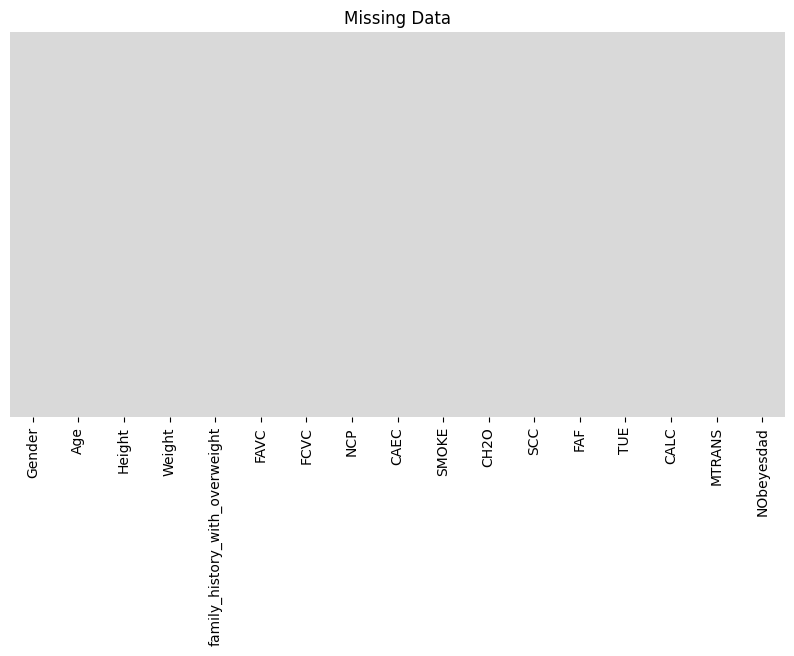

In [31]:
# Heatmap
sns.heatmap(data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [32]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [33]:
total_duplicados = data.duplicated().sum()


print(f"Total de registros duplicados encontrados: {total_duplicados}")

Total de registros duplicados encontrados: 24


In [38]:
# Muestra todas las filas que son duplicados (la primera aparición + todas sus copias)
duplicados_completos = data[data.duplicated(keep=False)].sort_values(by=['Weight', 'Height'])

print("\nPrimeras 10 filas de duplicados para inspección:")
print(duplicados_completos.head(30))


Primeras 10 filas de duplicados para inspección:
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []


In [40]:

# Eliminar duplicados completo
# 'keep="first"' mantiene la primera aparición y elimina todas las copias.
# 'inplace=True' modifica el DataFrame original directamente.
data.drop_duplicates(keep='first', inplace=True)


In [ ]:
# Identifica la variable objetivo (target)
target_col = 'NObeyesdad'

# Crea una lista de todas las columnas predictoras (features)
columnas_predictoras = [col for col in data.columns if col != target_col]

In [43]:
# Usa .duplicated(subset=columnas_predictoras) para encontrar duplicados
# basados solo en las características (ignora la etiqueta).
duplicados_predictores = data.duplicated(subset=columnas_predictoras, keep=False)

# Filtra el DataFrame para ver estos duplicados parciales
df_duplicados_parciales = data[duplicados_predictores].sort_values(by=columnas_predictoras)

print(f"Total de filas con valores duplicados en las variables predictoras: {len(df_duplicados_parciales)}")

Total de filas con valores duplicados en las variables predictoras: 0


## **3.Análisis Descriptivo:** Cálculo de estadísticas descriptivas como media, mediana, moda, y visualizaciones básicas de la distribución de los datos.

In [45]:
# Estadísticas descriptivas para todas las variables numéricas
print("--- Estadísticas Descriptivas (Variables Numéricas) ---")
print(data[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].describe().T)

--- Estadísticas Descriptivas (Variables Numéricas) ---
         count       mean        std    min        25%        50%         75%  \
Age     2087.0  24.353090   6.368801  14.00  19.915937  22.847618   26.000000   
Height  2087.0   1.702674   0.093186   1.45   1.630178   1.701584    1.769491   
Weight  2087.0  86.858730  26.190847  39.00  66.000000  83.101100  108.015907   
FCVC    2087.0   2.421466   0.534737   1.00   2.000000   2.396265    3.000000   
NCP     2087.0   2.701179   0.764614   1.00   2.697467   3.000000    3.000000   
CH2O    2087.0   2.004749   0.608284   1.00   1.590922   2.000000    2.466193   
FAF     2087.0   1.012812   0.853475   0.00   0.124505   1.000000    1.678102   
TUE     2087.0   0.663035   0.608153   0.00   0.000000   0.630866    1.000000   

           max  
Age      61.00  
Height    1.98  
Weight  173.00  
FCVC      3.00  
NCP       4.00  
CH2O      3.00  
FAF       3.00  
TUE       2.00  


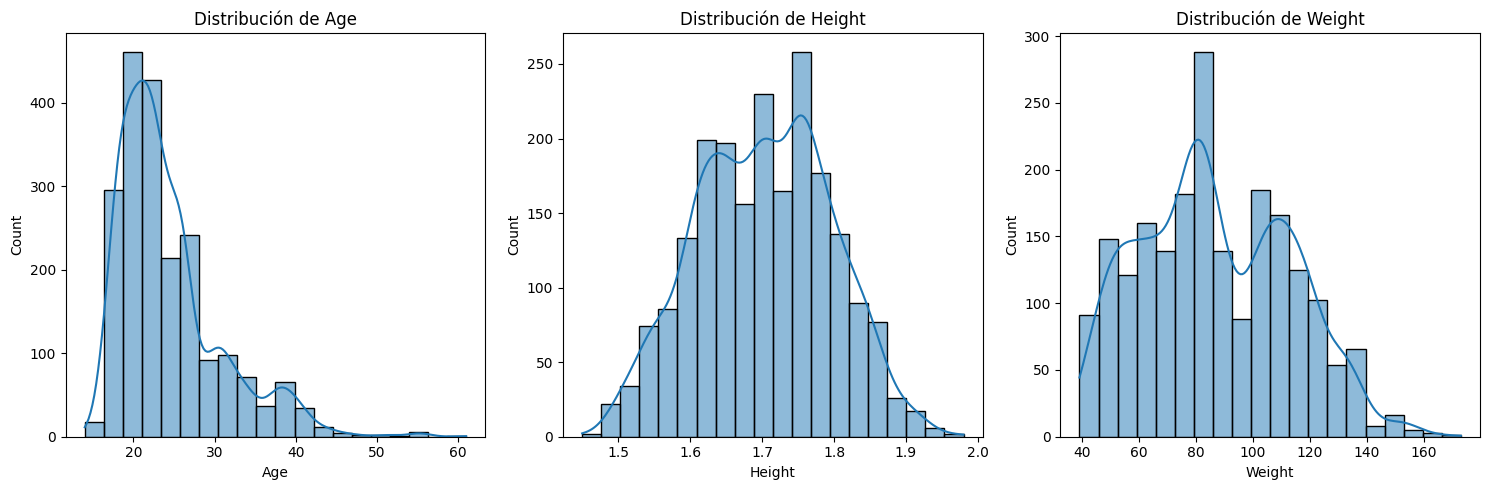

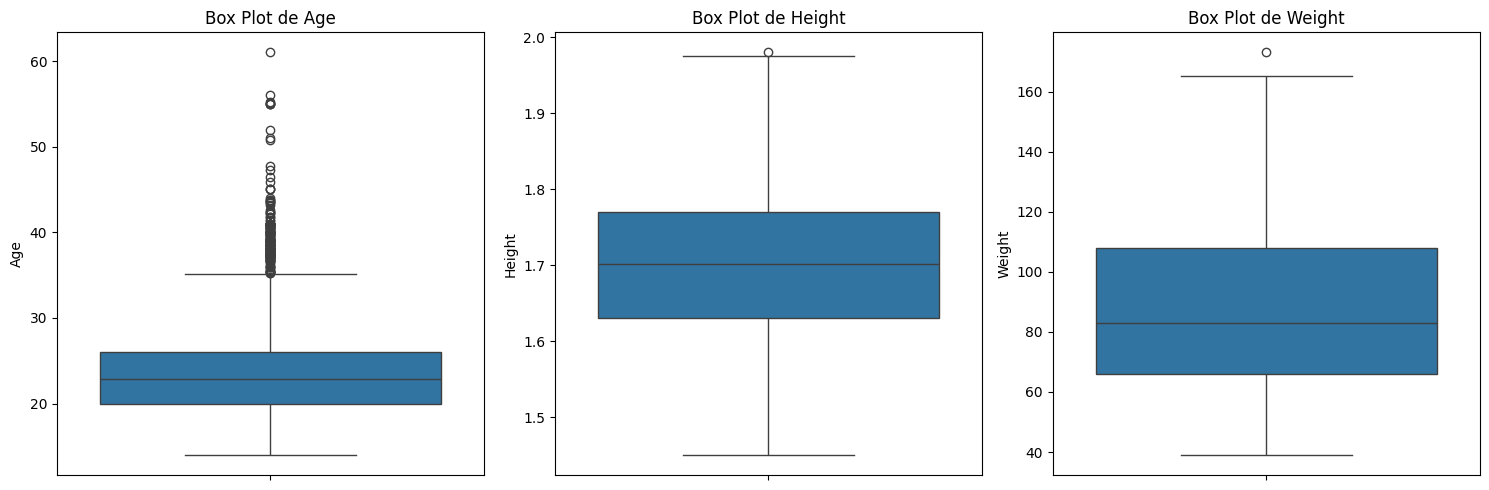

In [47]:


variables_continuas = ['Age', 'Height', 'Weight'] # Enfocándonos en las más críticas

plt.figure(figsize=(15, 5))

for i, col in enumerate(variables_continuas):
    # Histograma (Distribución)
    plt.subplot(1, 3, i+1)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

# Box Plots (Outliers y Sesgo)
plt.figure(figsize=(15, 5))
for i, col in enumerate(variables_continuas):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot de {col}')
    
plt.tight_layout()
plt.show()


--- Distribución de la Variable Objetivo (NObeyesdad) ---
Moda (Clase más común): Obesity_Type_I

Frecuencia de Clases (%):
NObeyesdad
Obesity_Type_I         16.82
Obesity_Type_III       15.52
Obesity_Type_II        14.23
Overweight_Level_II    13.90
Normal_Weight          13.51
Overweight_Level_I     13.22
Insufficient_Weight    12.79
Name: proportion, dtype: float64


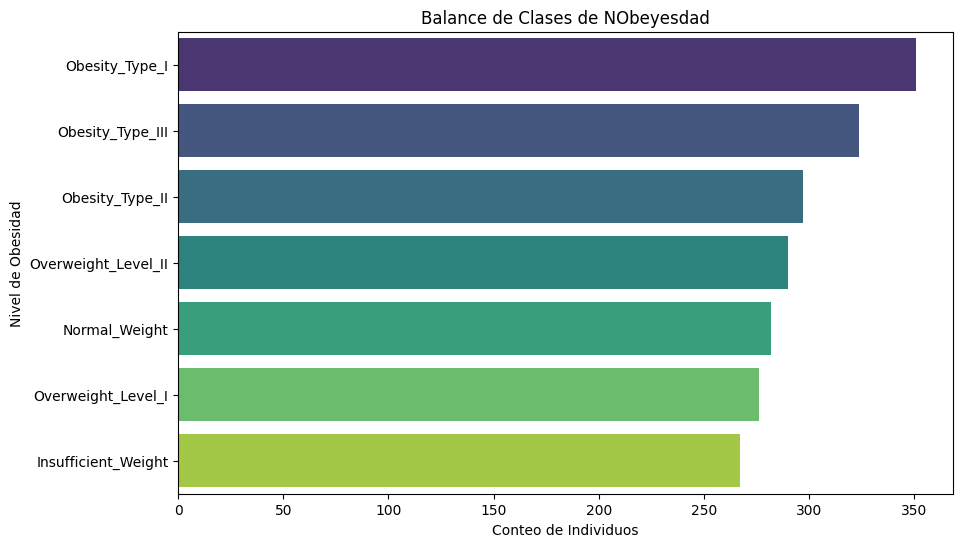

In [48]:
print("\n--- Distribución de la Variable Objetivo (NObeyesdad) ---")
# Cálculo de moda y frecuencia
moda_objetivo = data['NObeyesdad'].mode()[0]
frecuencia_clases = data['NObeyesdad'].value_counts(normalize=True).mul(100).round(2)

print(f"Moda (Clase más común): {moda_objetivo}")
print("\nFrecuencia de Clases (%):")
print(frecuencia_clases)

# Visualización del Balance de Clases
plt.figure(figsize=(10, 6))
sns.countplot(y=data['NObeyesdad'], order=data['NObeyesdad'].value_counts().index, palette='viridis')
plt.title('Balance de Clases de NObeyesdad')
plt.ylabel('Nivel de Obesidad')
plt.xlabel('Conteo de Individuos')
plt.show()


--- Frecuencia de Variables Categóricas Seleccionadas ---

Gender:
Gender
Male      1052
Female    1035
Name: count, dtype: int64

family_history_with_overweight:
family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64

MTRANS:
MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64


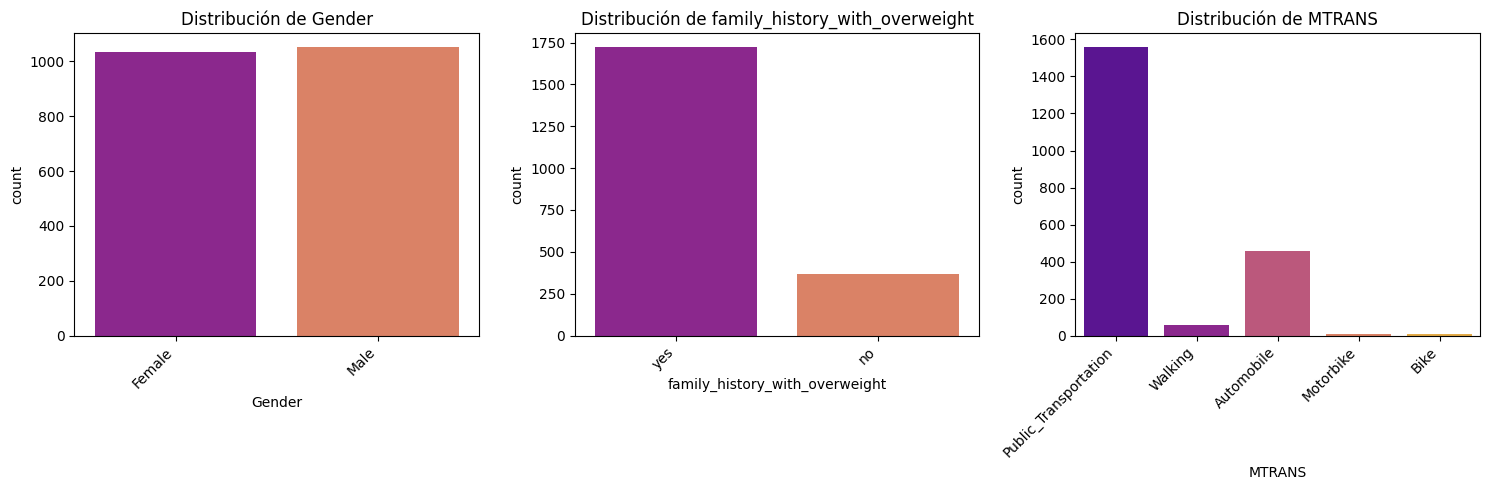

In [49]:
variables_categoricas = ['Gender', 'family_history_with_overweight', 'MTRANS']

print("\n--- Frecuencia de Variables Categóricas Seleccionadas ---")
for col in variables_categoricas:
    print(f"\n{col}:")
    print(data[col].value_counts())

# Visualización de Variables Categóricas
plt.figure(figsize=(15, 5))
for i, col in enumerate(variables_categoricas):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=df[col], palette='plasma')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

## **4.Visualizaciones Gráficas:** Creación de gráficos que muestren la relación entre variables, distribuciones y otras características importantes (por ejemplo, histogramas, diagramas de dispersión, boxplots).

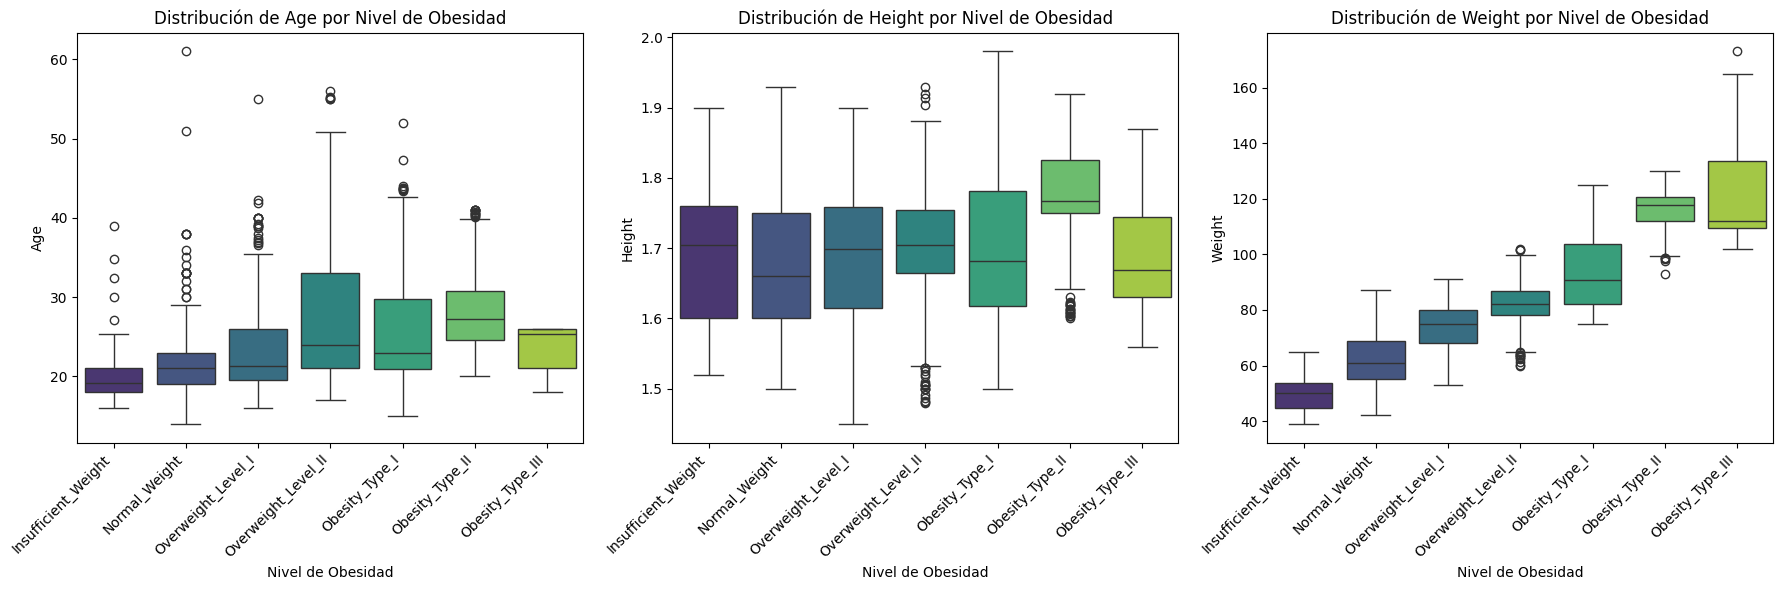

In [50]:
# Definir la lista de variables numéricas a analizar
variables_continuas = ['Age', 'Height', 'Weight']

# Definir el orden de las clases de obesidad (ordinal)
orden_clases = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]

plt.figure(figsize=(18, 6))

for i, col in enumerate(variables_continuas):
    plt.subplot(1, 3, i + 1)
    
    # Crea el Box Plot
    sns.boxplot(
        x='NObeyesdad', 
        y=col, 
        data=df, 
        order=orden_clases, 
        palette='viridis'
    )
    plt.title(f'Distribución de {col} por Nivel de Obesidad', fontsize=12)
    plt.xlabel('Nivel de Obesidad')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje X para mejor lectura

plt.tight_layout()
plt.show()

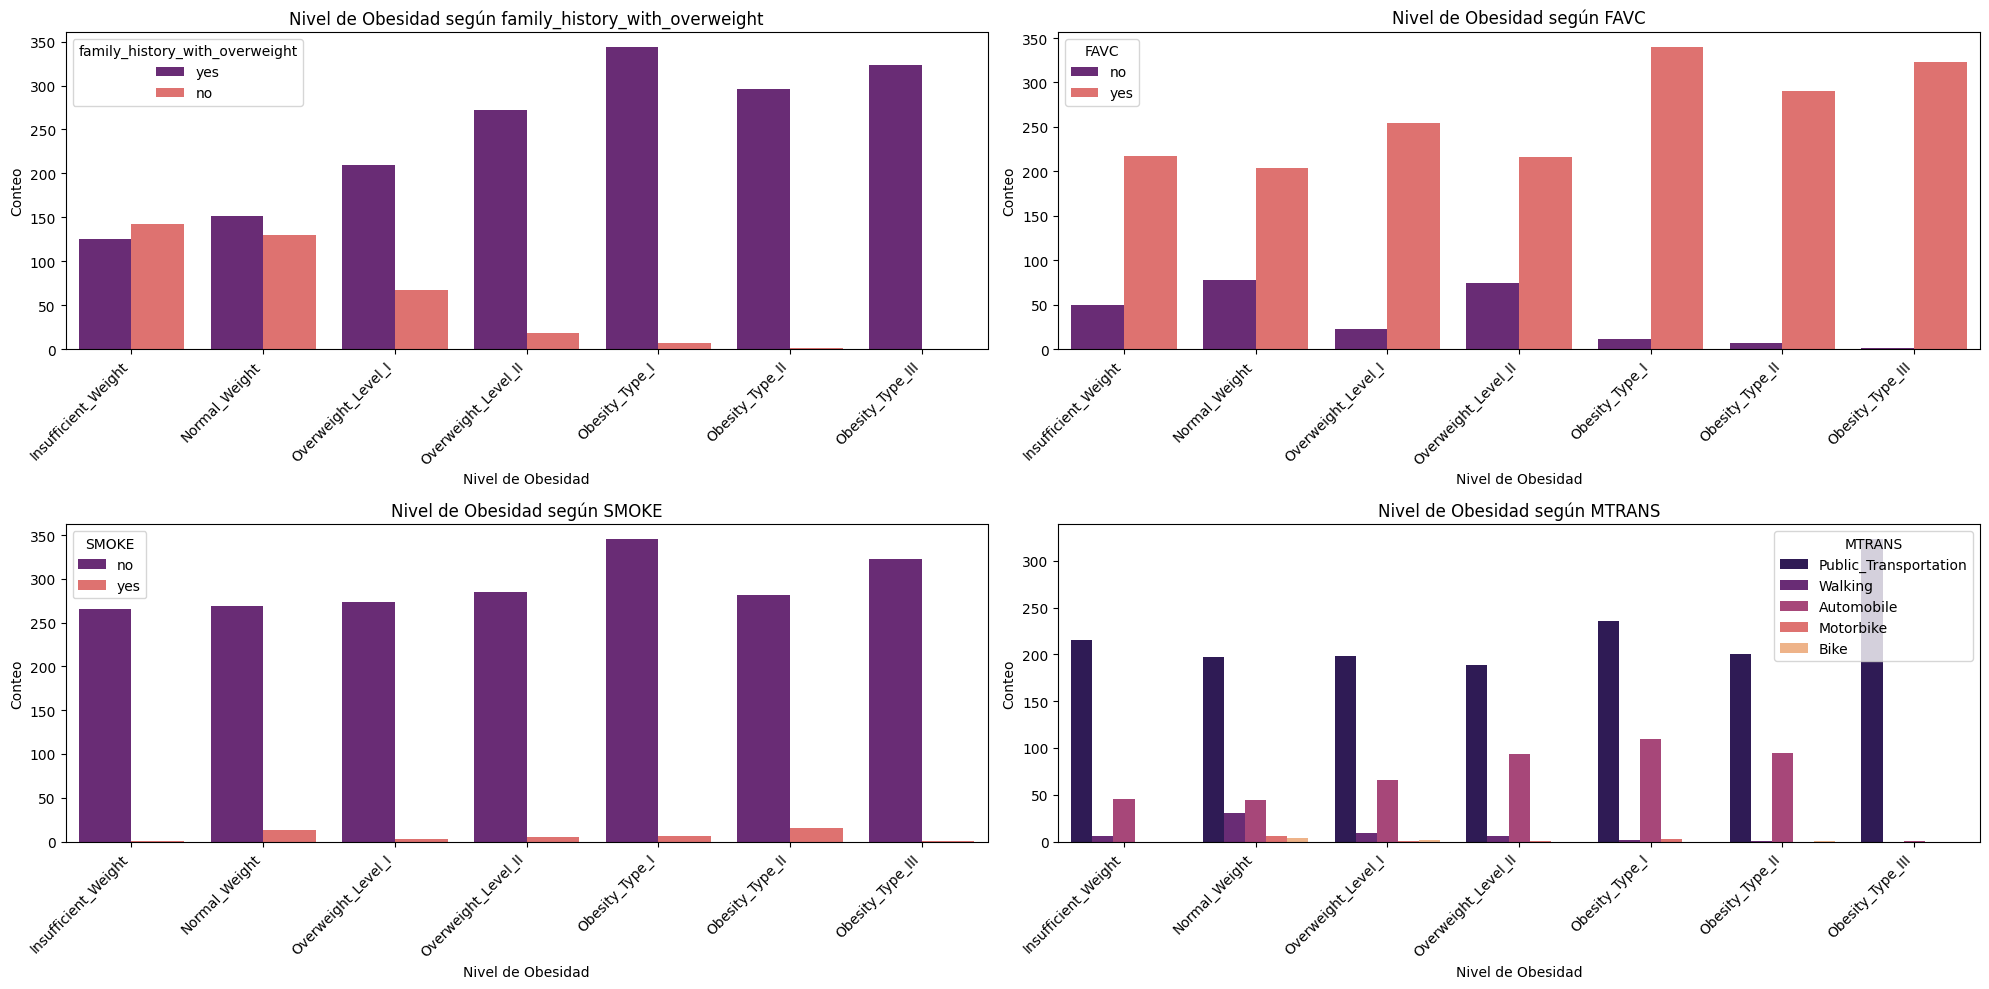

In [51]:
# Variables clave de hábitos y demográficas
variables_categoricas = [
    'family_history_with_overweight', # Historial familiar
    'FAVC',                           # Consumo frecuente de alta caloría
    'SMOKE',                          # Fuma
    'MTRANS'                          # Tipo de Transporte
]

plt.figure(figsize=(20, 10))

for i, col in enumerate(variables_categoricas):
    plt.subplot(2, 2, i + 1)
    
    # Crea el Count Plot (gráfico de barras) con NObeyesdad en el eje X
    sns.countplot(
        x='NObeyesdad', 
        hue=col, 
        data=df, 
        order=orden_clases, 
        palette='magma'
    )
    plt.title(f'Nivel de Obesidad según {col}', fontsize=12)
    plt.xlabel('Nivel de Obesidad')
    plt.ylabel('Conteo')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=col)

plt.tight_layout()
plt.show()

## **5.Correlaciones:** Análisis de la correlación entre variables numéricas.


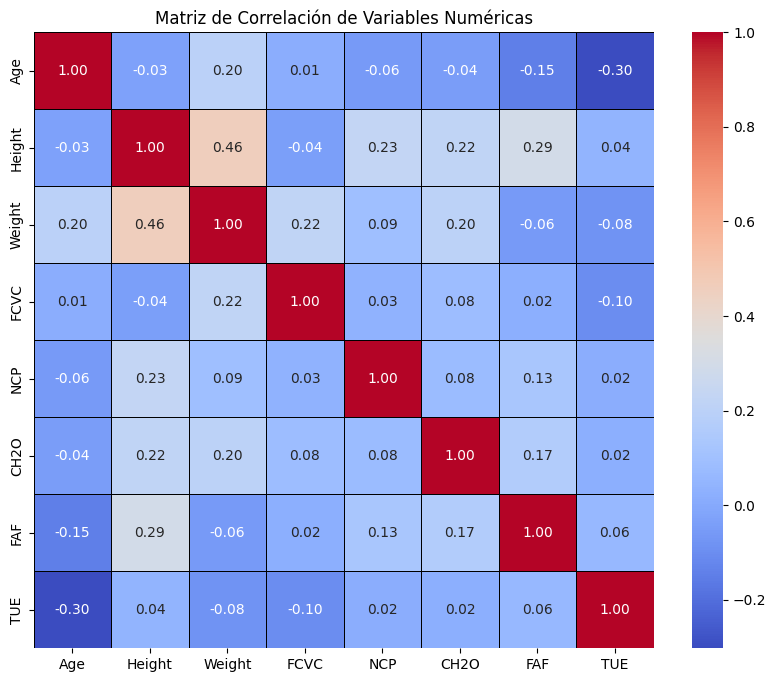

In [52]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
df_numerico = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Pearson
correlacion_matriz = df_numerico.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlacion_matriz, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm',
    linewidths=.5, 
    linecolor='black'
)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## **5.Insights:**  Identificación de patrones, tendencias, o anomalías en los datos que puedan ser relevantes para futuros análisis o modelado.


Este análisis exploratorio de datos (EDA) ha revelado patrones muy claros sobre los factores que influyen en los niveles de obesidad, lo cual es crucial para la fase de modelado.
---

**Patrones y Tendencias Clave**
El Peso es el Predictor Más Fuerte: Como era de esperar, existe una correlación directa y casi perfecta entre el Weight (Peso) y el nivel de obesidad (NObeyesdad). La mediana de peso aumenta de forma constante y predecible a través de las 7 clases de obesidad.

Influencia Genética Dominante: La variable family_history_with_overweight es un factor dominante. En las clases de Obesidad Tipo I, II y III, el porcentaje de individuos con historial familiar es casi del 100%. Esto indica que esta variable será una de las más importantes para el modelo, potencialmente opacando otros hábitos modificables.

Sedentarismo y Dieta:

Transporte (MTRANS): El uso de Automobile se dispara en las clases de obesidad severa, mientras que el transporte activo (Walking, Public_Transportation) es más común en las clases de peso normal e insuficiente. Esto subraya la importancia del sedentarismo.

Dieta (FAVC): El consumo frecuente de alimentos ricos en calorías (FAVC='Yes') es una característica predominante en todos los niveles de sobrepeso y obesidad.

---
**Anomalías y Consideraciones para el Preprocesamiento**
Duplicados Eliminados: Se eliminó un total de 24 registros duplicados completos para asegurar que el modelo no se sobreajuste a datos redundantes.

Desbalance de Clases: Se observó un ligero desbalance en las 7 clases de la variable objetivo (NObeyesdad). Aunque no es extremo (dado que el dataset fue parcialmente sintetizado), será importante considerar la ponderación de clases o técnicas como SMOTE para asegurar que las clases minoritarias (ej., Obesity_Type_III) sean bien representadas durante el entrenamiento.

Variables Ordinales como Continuas: Las variables de hábitos como FCVC, NCP, CH2O, FAF, y TUE son numéricas, pero representan rangos de frecuencia (son ordinales). En la siguiente fase, decidiremos si codificarlas como categóricas o si mantener su tratamiento como continuas, ya que esto impactará la forma en que el modelo interpreta las "distancias" entre los valores.

El siguiente paso será la Transformación de Variables Categóricas (One-Hot Encoding) y la Normalización/Estandarización de las variables continuas para preparar los datos para los algoritmos de Machine Learning.